# Imports

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples=1000, n_features=10, shuffle=True, random_state=42, cluster_std=3.0, centers=5)
# X = pd.read_csv("../data/mallcustomers.csv").drop(columns=["CustomerID"]).rename(columns={"Annual Income (k$)": "annual_income", "Spending Score (1-100)": "spending_score"})
# X.columns = [c.lower() for c in X.columns]

# X.loc[X['gender'] == 'Male', 'gender'] = 1
# X.loc[X['gender'] == 'Female', 'gender'] = 0

In [3]:
ss = StandardScaler()
X_ss = pd.DataFrame(ss.fit_transform(X), columns=[f'{c}_ss' for c in range(0, X.shape[1])])

# KMeans

In [4]:
from dstoolkit.automl import AutoMLKMeans

/home/junior/GitHub/data-science-toolkit/venv/lib64/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
a = AutoMLKMeans(X_ss, n_trials=100)

In [6]:
a.train()

/home/junior/GitHub/data-science-toolkit/venv/lib64/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/junior/GitHub/data-science-toolkit/venv/lib64/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/junior/GitHub/data-science-toolkit/venv/lib64/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/junior/GitHub/data-science-toolkit/venv/lib64/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/junior/GitHub/data-science-toolkit/venv/lib64/python3.13/site-pack

In [7]:
a.get_metrics()

,Base KMeans Model,PCA KMeans Model,UMAP KMeans Model
Silhouetete,0.356888,0.590259,0.925894
Davies Bouldin,1.130272,0.546189,0.108804
Calinski Harabasz,517.772109,2449.398670,61230.824219


Base KMeans Model


Silhouetete            0.356888
Davies Bouldin         1.130272
Calinski Harabasz    517.772109
Name: Base KMeans Model, dtype: float64

X has more than 5 features, selecting the first 5 for visualization.


<Figure size 1000x600 with 0 Axes>

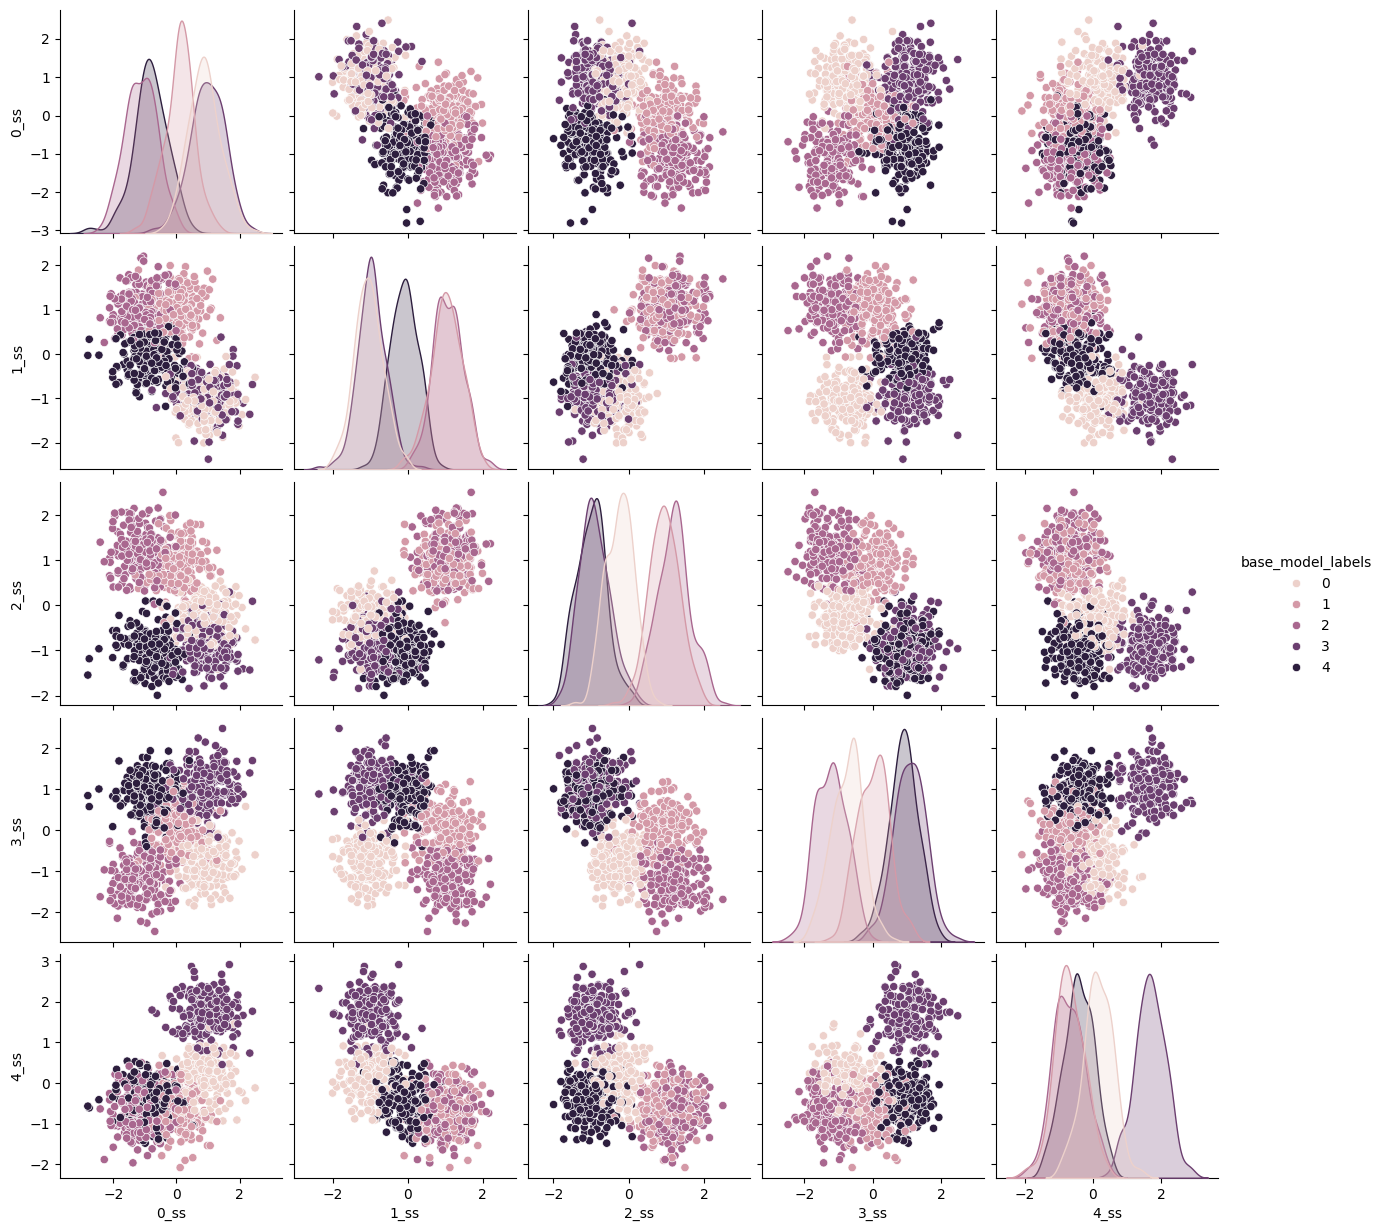

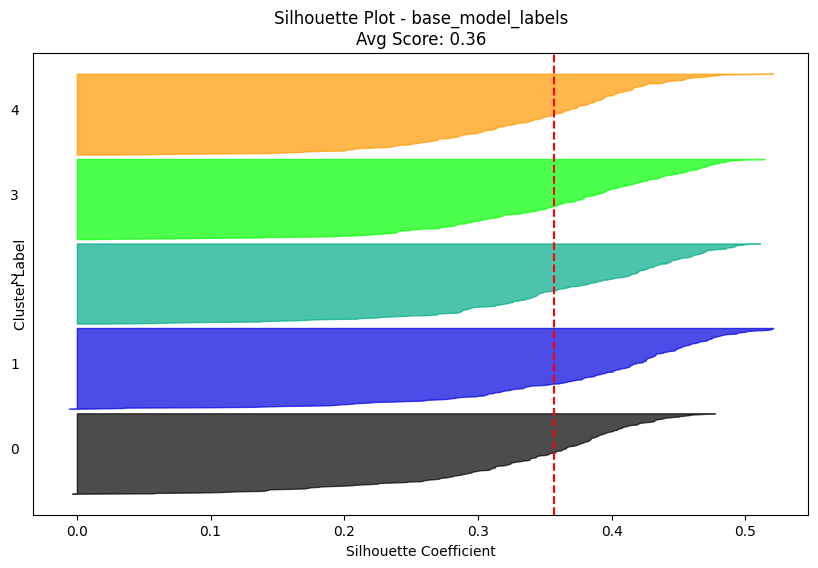

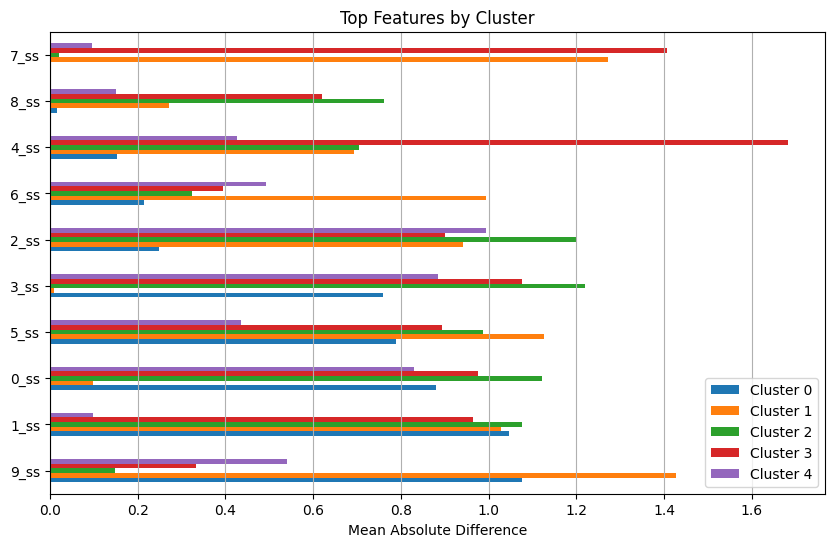

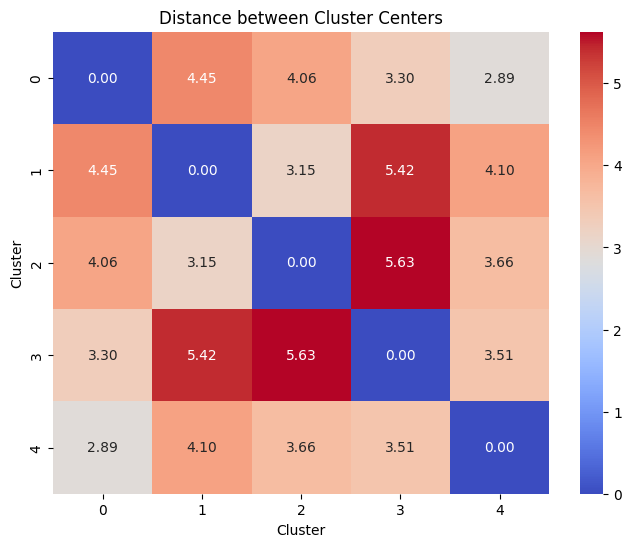

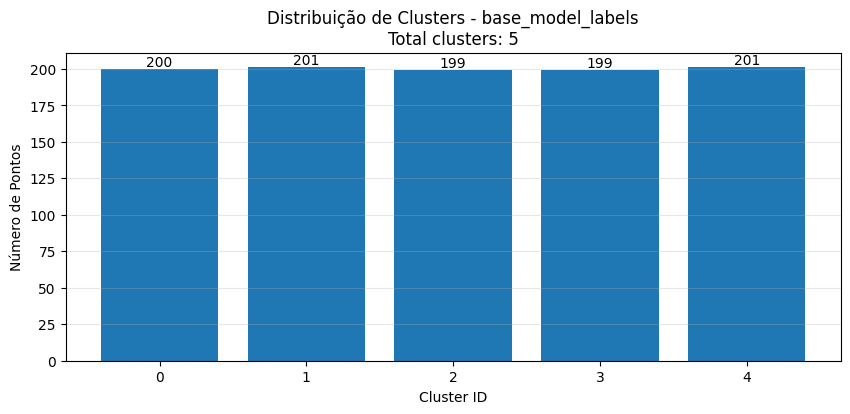

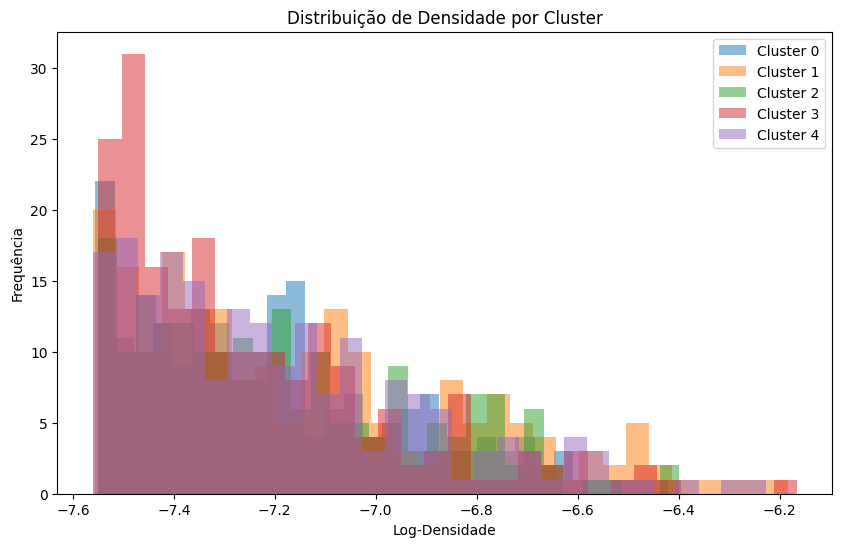

PCA KMeans Model


Silhouetete             0.590259
Davies Bouldin          0.546189
Calinski Harabasz    2449.398670
Name: PCA KMeans Model, dtype: float64

<Figure size 1000x600 with 0 Axes>

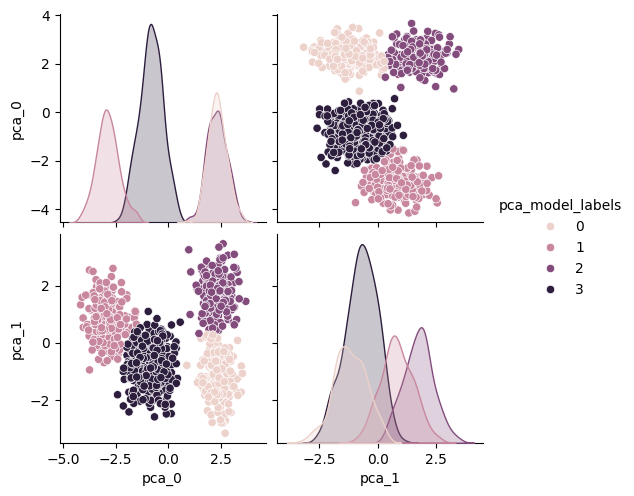

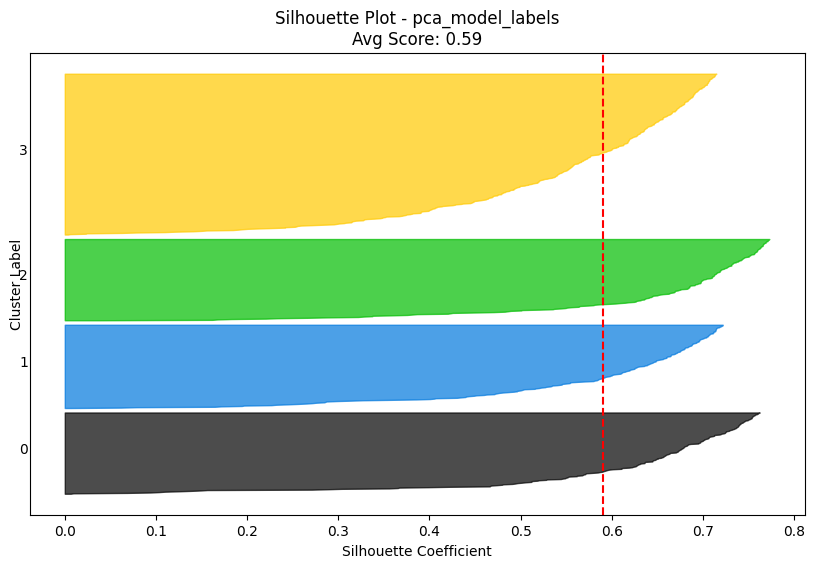

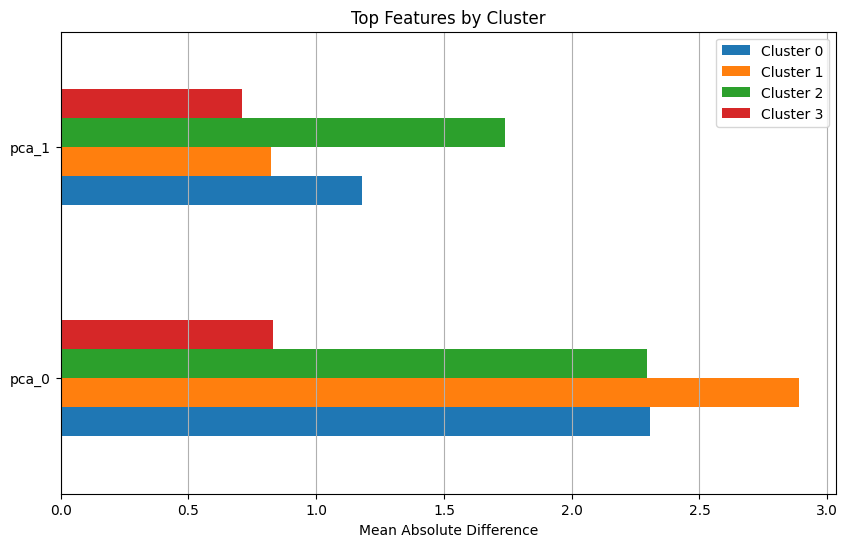

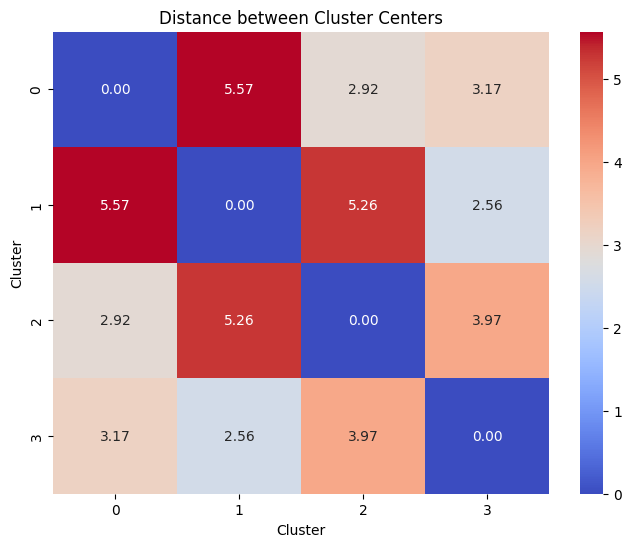

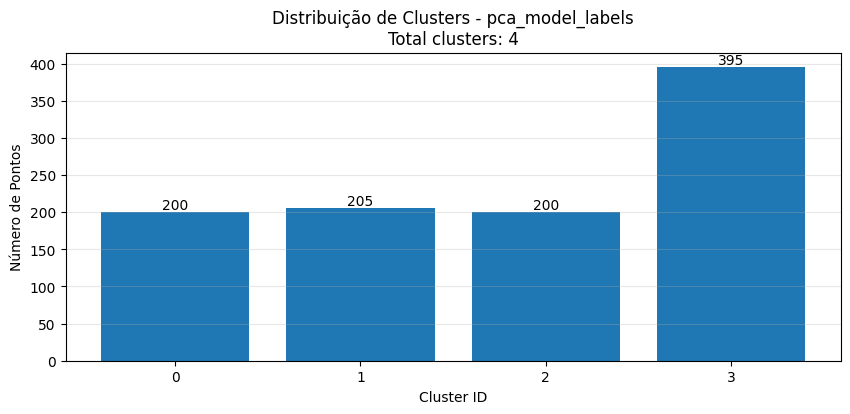

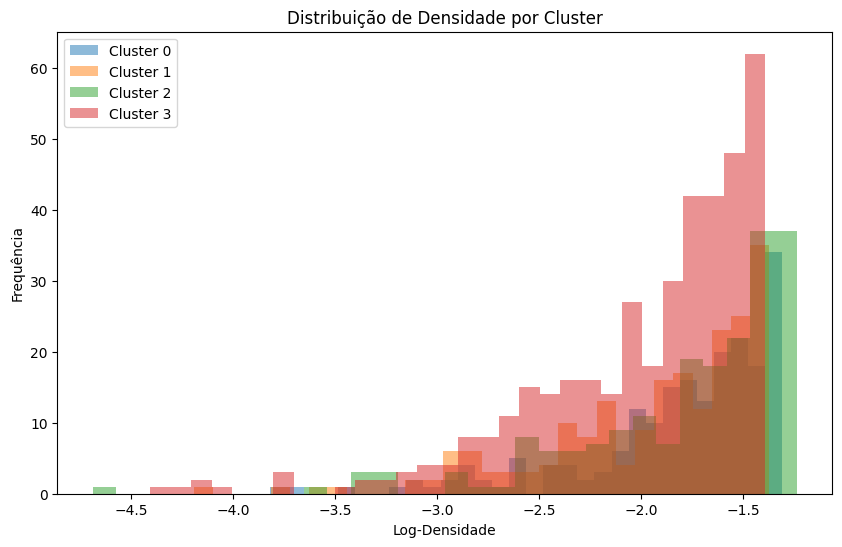

UMAP KMeans Model


Silhouetete              0.925894
Davies Bouldin           0.108804
Calinski Harabasz    61230.824219
Name: UMAP KMeans Model, dtype: float64

<Figure size 1000x600 with 0 Axes>

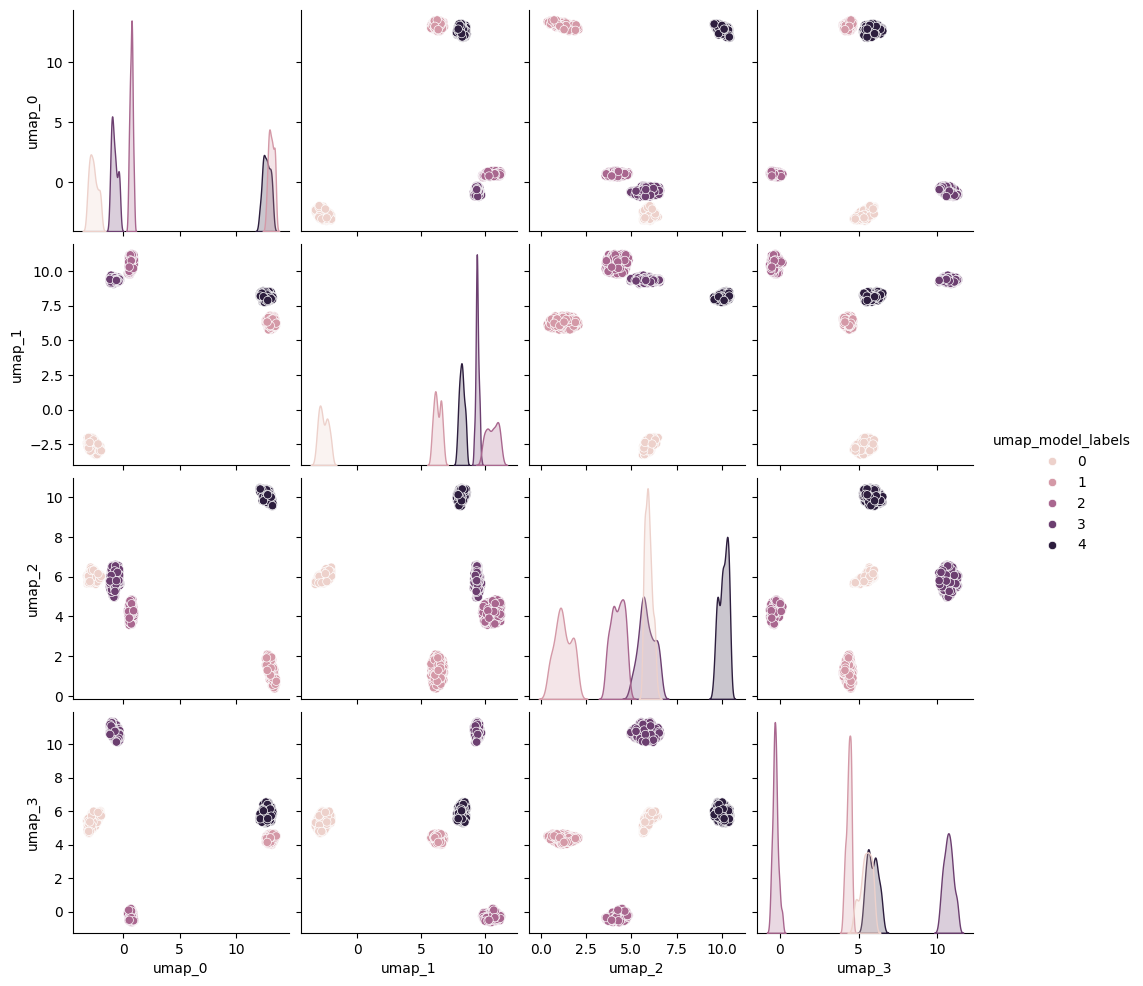

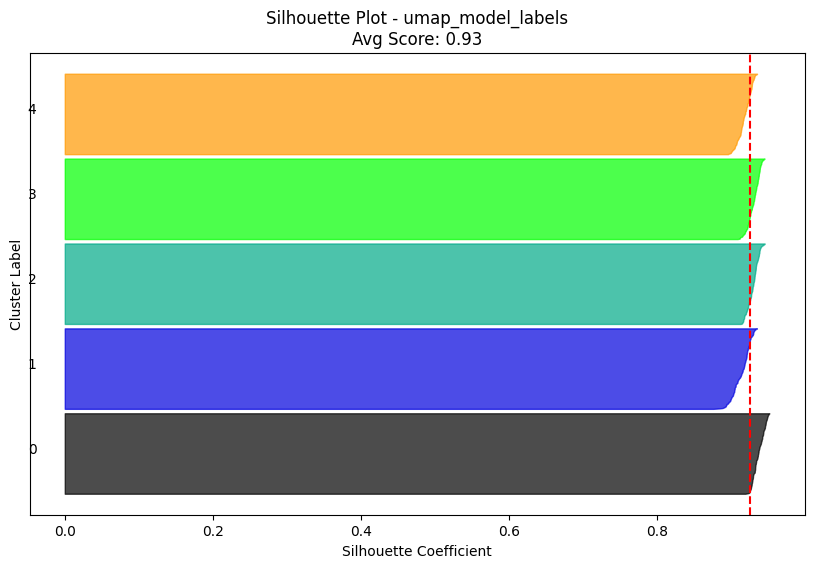

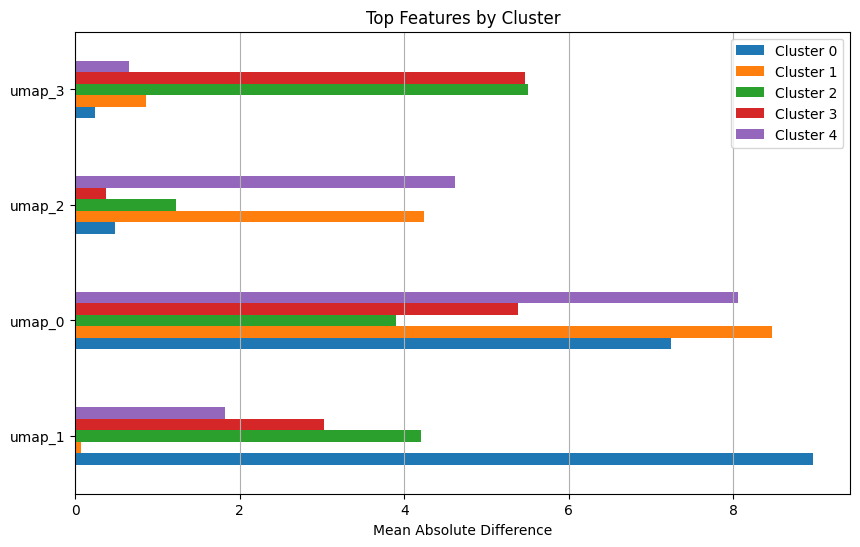

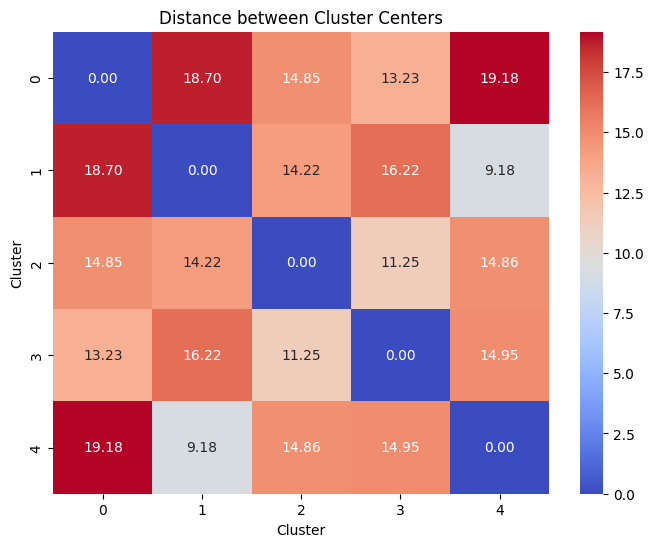

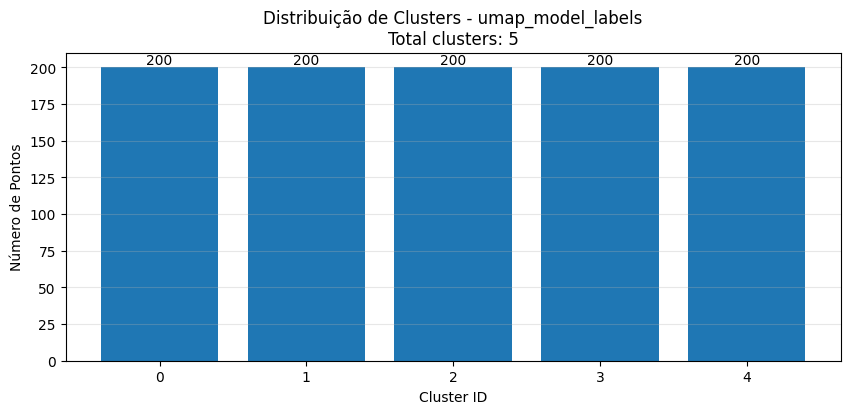

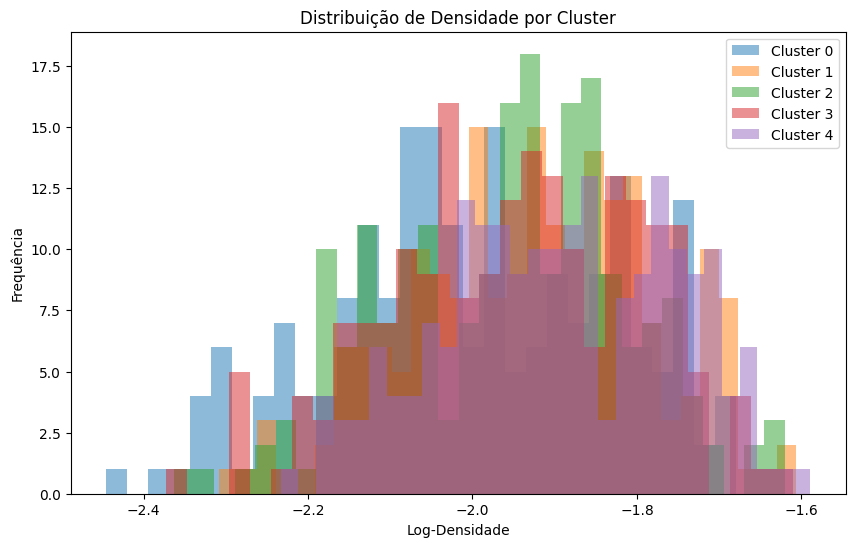

In [8]:
a.get_result_analysis()